In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from glob import glob
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [37]:
from pathlib import Path

if os.name == 'nt':
    file_path = 'C:\\JL\\Master\\DSE_I2100_Applied Machine Learning and Data Mining\\Final_Project\\lgg-mri-segmentation'
else:
    file_path = os.path.join(os.path.expanduser("~"), "Downloads/")


In [38]:
os.path.join(os.path.expanduser('~'), 'Downloads/')+ os.path.join('kaggle_3m','*','*_mask*')

'/Users/juanguerrero/Downloads/kaggle_3m/*/*_mask*'

In [40]:
# Set parameters
Size = (256, 256)
# mask_files = glob('../input/lgg-mri-segmentation/kaggle_3m/*/*_mask*')
mask_files = glob(file_path + os.path.join('kaggle_3m','*','*_mask*'))
train_files = [file.replace('_mask', '') for file in mask_files]

In [41]:

def label(mask):
    value = np.max(imread(mask))
    return '1' if value > 0 else '0'
df = pd.DataFrame({"image": train_files,
                   "mask": mask_files,
                  "label":[label(x) for x in mask_files]})

In [42]:
len(train_files)

3929

In [43]:
df.head()

image  \
0  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...   
1  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...   
2  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...   
3  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...   
4  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...   

                                                mask label  
0  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...     0  
1  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...     0  
2  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...     0  
3  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...     0  
4  /Users/juanguerrero/Downloads/kaggle_3m/TCGA_C...     0

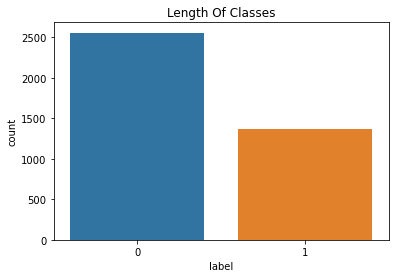

In [44]:
sns.countplot(data=df,x=df['label'])
plt.title('Length Of Classes')
plt.show()

# EDA